there 76347
        sseqid
0  NM_020153.4
1   AC231769.2
NM_020153.4    1
AC231769.2     1
Name: sseqid, dtype: int64
120
        sseqid  count
0  NM_020153.4      1
1   AC231769.2      1
2        Other      0


/tmp/ipykernel_30126/4131611886.py:123: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count = sseq_count_series2.append(ser)


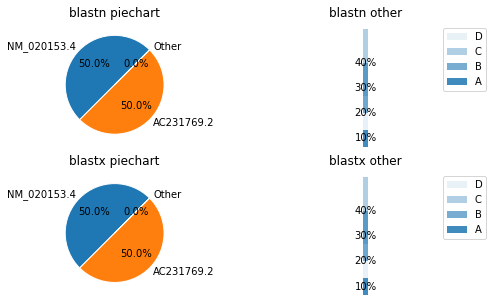

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import xmltodict
from xml.dom import minidom


#handles command line input parameter
import sys
import os

blast_tsv_file = 'test3.tsv'
blast_tsv_file2 = 'test.tsv'
# piePath = sys.argv[2]
# piePathSample = os.path.splitext(piePath)[0]
# piePathSample2 = os.path.split(piePathSample)
pieName = 'aPie'

# #ncbi query functions
# def esearch(term, db='gds'):
#     """
#     Queries NCBI using the esearch utility. GEO ('gds') database is used as default for search term.
#     """
#     url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db={db}&term={term}&retmax=5000&usehistory=y'
#     response = urllib.request.urlopen(url)
#     return response.read()


# def get_esummary(esearch_string, db='gds'):
#     """
#     Parses a http response in XML format to obtain the webenv and querykey tokens.
#     Uses NCBI eutils to transform these tokens into web summaries of GEO (db='gds') datasets.
#     """
#     xmldoc = minidom.parseString(esearch_string)
#     try:
#         webenv = xmldoc.getElementsByTagName('WebEnv')[0].firstChild.data
#         querykey = xmldoc.getElementsByTagName('QueryKey')[0].firstChild.data
#         host = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi'
#         params = f'?db={db}&version=2.0&query_key={querykey}&WebEnv={webenv}'
#         url = host + params
#         response = urllib.request.urlopen(url)
#         return response.read()
#     except IndexError as e:
#         print(f"Unparsable publication string ({e}, search={esearch_string}")
#         return ""

#matplotlib to build the piechart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 5))
ax1.set_title('blastn piechart')
ax2.set_title('blastn other')
ax3.set_title('blastx piechart')
ax4.set_title('blastx other')
fig.subplots_adjust(wspace=0)

# fig, ax = plt.subplots()

df = pd.read_csv(blast_tsv_file, header=None, sep='\t')
num_seqs = df.size
df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df4 = pd.read_csv(blast_tsv_file2, header=None, sep='\t')
df4.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
print("there " + str(df4['qseqid'].nunique()))



df2 = df[['qseqid','sseqid','evalue']].copy()

#blast output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list = []
qseqid_list = []
for idx in df.index:
        if df['qseqid'][idx] not in qseqid_list:
                qseqid_list.append(df['qseqid'][idx])
                sseqid_list.append(df['sseqid'][idx])
sseqid_np = np.array(sseqid_list)

df3 = pd.DataFrame(data = sseqid_np, columns=['sseqid'])
print(df3)

sseq_count_series = df3['sseqid'].value_counts()
print(sseq_count_series)

#loop through series to determine which elements to remove and add into "other" column
to_remove = []
other_count = 0

print(num_seqs)

#taking 1% of number of sequences
for index,values in sseq_count_series.iteritems():
        if(values < (0.001)*(num_seqs)):
                to_remove.append(index)
                other_count += values


#remove these elements from series
sseq_count_series2 = sseq_count_series.drop(to_remove)

# sseq_name_list = []
# sseqid = []
# #replace index sseqids with ncbi name
# for index,values in sseq_count_series2.iteritems():
#         sseqid.append(index)
#         term = str(index)
#         esearch_string = esearch(term=term, db='nucleotide')
#         result = get_esummary(esearch_string=esearch_string, db='nucleotide')
#         result = xmltodict.parse(result)
#         sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
#         sseq_name_list.append(sseq_name)
#         #sseq_count_series2.rename(index={index:sseq_name})
# #replace the sseqids with ncbi query names
# replacements = {sseqid:sseq_name_list for sseqid, sseq_name_list in zip(sseqid, sseq_name_list)}
# sseq_count_series3 = sseq_count_series2.rename(replacements)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d = {'Other':other_count}
ser = pd.Series(data=d, index=['Other'])

#append new element
sseq_count = sseq_count_series2.append(ser)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df = pd.DataFrame({'sseqid':sseq_count.index, 'count':sseq_count.values})
print(sseq_count_df)

count = sseq_count_df['count']
sseq = sseq_count_df['sseqid']









gene_ratios = [0.1, 0.3, 0.4, 0.2]

gene_labels = ['A','B','C','D']
bottom = 1
width = .2
wedges1, *_ = ax1.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom = height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Other unmapped reads')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * 2, 2.5 * 2)

wedges2, *_ = ax3.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom = height
    bc = ax4.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax4.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
# ax4.set_title('Other unmapped reads')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * 2, 2.5 * 2)









# ax.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
#         wedgeprops={"linewidth": 1, "edgecolor": "white"})

plt.show(block=True)
# plt.savefig(piePath,format='png',bbox_inches='tight')



